In [34]:
from statistics import mean, stdev as sd
import spacy
import tqdm

In [2]:
nlp = spacy.load("en_core_web_lg")

In [3]:
def parse_individual_tikz(tikz):
    lines = tikz.split(r"\depedge[edge style={red!60!}, edge below]")
    
    sent, *lines = lines
    try:
        f, *s, l = sent.split(r'\&')
        sent = ' '.join([f.split()[-1]] + s + [l.split()[0]])
    except:
        return [None, None]
    # print(lines)
    lines = [i for i in lines if i.startswith("{")]
    # print(lines)
    lines = [[j.strip("{") for j in i.split("\n")[0].strip().split("}")[:-2]] for i in lines]
    # print(lines)
    lines = [list(map(int, i)) for i in lines]
    # print(lines)
    return [sent, lines]
    
def parse_full_tikz(tikz_file):
    with open(tikz_file, "r") as f:
        for tikz in f.read().split(r"\begin{dependency}")[1:]:
            yield parse_individual_tikz(tikz)

def compute_uuas(ground, test):
    # print(ground, test)
    n_correct = 0
    n_total = 0
    for (k, v) in test:
        n_total += 1
        if [k, v] in ground:
            n_correct += 1
    # print(test, n_correct, n_total)
    if n_total == 0:
        return None
    return n_correct / n_total

In [4]:
parse_individual_tikz("""\begin{dependency}[hide label, edge unit distance=.5ex]
  \begin{deptext}[column sep=0.05cm]
  Mr.\& Glazier\& discovered\& that\& the\& Founders\& had\& worried\& that\& Congress\& might\& take\& the\& President\& out\& of\& the\& loop. \\
\end{deptext}
\depedge[edge style={red!60!}, edge below]{15}{16}{.}
\depedge[edge style={red!60!}, edge below]{1}{2}{.}
\depedge[edge style={red!60!}, edge below]{13}{14}{.}
\depedge[edge style={red!60!}, edge below]{7}{8}{.}
\depedge[edge style={red!60!}, edge below]{6}{8}{.}
\depedge[edge style={red!60!}, edge below]{3}{8}{.}
\depedge[edge style={red!60!}, edge below]{12}{15}{.}
\depedge[edge style={red!60!}, edge below]{5}{6}{.}
\depedge[edge style={red!60!}, edge below]{8}{12}{.}
\depedge[edge style={red!60!}, edge below]{9}{10}{.}
\depedge[edge style={red!60!}, edge below]{15}{18}{.}
\depedge[edge style={red!60!}, edge below]{16}{17}{.}
\depedge[edge style={red!60!}, edge below]{12}{14}{.}
\depedge[edge style={red!60!}, edge below]{11}{12}{.}
\depedge[edge style={red!60!}, edge below]{10}{12}{.}
\depedge[edge style={red!60!}, edge below]{4}{8}{.}
\depedge[edge style={red!60!}, edge below]{2}{3}{.}
\end{dependency}""")

<>:1: SyntaxWarning: invalid escape sequence '\&'
<>:1: SyntaxWarning: invalid escape sequence '\&'
/var/folders/my/xjpgt3ss01991yghb67xgjs80000gn/T/ipykernel_73946/4285497627.py:1: SyntaxWarning: invalid escape sequence '\&'
  parse_individual_tikz("""\begin{dependency}[hide label, edge unit distance=.5ex]


['Mr.  Glazier  discovered  that  the  Founders  had  worried  that  Congress  might  take  the  President  out  of  the loop.',
 [[15, 16],
  [1, 2],
  [13, 14],
  [7, 8],
  [6, 8],
  [3, 8],
  [12, 15],
  [5, 6],
  [8, 12],
  [9, 10],
  [15, 18],
  [16, 17],
  [12, 14],
  [11, 12],
  [10, 12],
  [4, 8],
  [2, 3]]]

In [5]:
path = "/Users/simonchervenak/Documents/GitHub/structural-probes/example/results_bert/{file}/demo.tikz"

orig_sents = list(parse_full_tikz(path.format(file="all_uuas_1_orig")))
new_sents = list(parse_full_tikz(path.format(file="all_uuas_1_new")))
x = [compute_uuas(a[1], b[1]) for a, b in zip(orig_sents, new_sents) if a[1] and b[1]]

print("Average UUAS for spacy=95: ", mean(x), sd(x), len(x))

Average UUAS for spacy=95:  0.5625749896991632 0.16387082130525196 4874


In [6]:
len(orig_sents[2])

2

In [ ]:
sent = "Analysts said the company's troubles mirror those of the industry."

In [173]:
def calculate_uuas(a, b):
    t = 0
    c = 0
    for (k, v) in b:
        t += 1
        if [k, v] in a or [v, k] in a:
            c += 1
    return c / t

def get_spacy_edges(sentence):
    doc = nlp(sentence)
    edges = []
    indices = list(map(str, doc))
    for i, j in enumerate(doc):
        edges.append([i + 1, indices.index(str(j.head)) + 1])
        # edges.append([indices.index(str(j.head)) + 1, i + 1])

    return edges
    
def calculate_spacy_uuas(file, original_file):
    total_uuas = 0
    count = 0
    for (sent, parse), (real_sent, parse2) in tqdm.tqdm(list(zip(parse_full_tikz(file), parse_full_tikz(original_file)))):
        if sent and parse and real_sent:
            # print(sent)
            
            s = ' '.join(real_sent.split())
            a = get_spacy_edges(s)
            if len(a) > 10:
                continue
            count += 1
            score = calculate_uuas(a, parse)
            total_uuas += score
            # if score < 0.7:
                # print(s)
                # input()
            # print(s)
            # print(parse)
            # print(get_spacy_edges(s))
            # print(score)
            # input()
            # print(get_spacy_edges(s))
            # print(parse)
            # print(score)
            # print(sent, real_sent)
            # print(parse)
            # print(score)
            # input()
            # print(score, len(c), len(gu), len(pu))
            # return
    return total_uuas / count

In [9]:
old = "/Users/simonchervenak/Documents/GitHub/structural-probes/testing/structural-probes/example/results/BERT-disk-demo-2025-4-21-18-13-19-359826/demo.tikz"
new = "/Users/simonchervenak/Documents/GitHub/structural-probes/testing/structural-probes/example/results/BERT-disk-demo-2025-4-21-18-13-56-559861/demo.tikz"

In [169]:
f = "/Users/simonchervenak/Documents/GitHub/structural-probes/example/results_bert/tdev_uuo/demo.tikz"
calculate_spacy_uuas(f, f)

100%|████████████████████████████████████████| 198/198 [00:00<00:00, 527.01it/s]


0.7689496634404513

In [11]:
f = "/Users/simonchervenak/Documents/GitHub/structural-probes/example/results_bert/tdev3o/demo.tikz"
calculate_spacy_uuas(f, f)

100%|████████████████████████████████████████| 701/701 [00:01<00:00, 409.03it/s]


0.7169563915178838

In [12]:
f = "/Users/simonchervenak/Documents/GitHub/structural-probes/example/results_bert/tdev3o/demo.tikz"
f2 = "/Users/simonchervenak/Documents/GitHub/structural-probes/example/results_bert/tdev3n/demo.tikz"

calculate_spacy_uuas(f2, f)

100%|████████████████████████████████████████| 701/701 [00:01<00:00, 469.63it/s]


0.571611774355844

In [174]:
all_old = "/Users/simonchervenak/Documents/GitHub/structural-probes/testing/structural-probes/example/results/all_old/demo.tikz"
all_new = "/Users/simonchervenak/Documents/GitHub/structural-probes/testing/structural-probes/example/results/all_new/demo.tikz"

calculate_spacy_uuas(all_new, all_old)

100%|██████████████████████████████████████| 3037/3037 [00:06<00:00, 473.57it/s]


0.6218853979163252

In [13]:
old2 = "/Users/simonchervenak/Documents/GitHub/structural-probes/testing/structural-probes/example/results/BERT-disk-demo-2025-4-21-19-14-16-540163/demo.tikz"
new2 = "/Users/simonchervenak/Documents/GitHub/structural-probes/testing/structural-probes/example/results/BERT-disk-demo-2025-4-21-19-14-25-172657/demo.tikz"

In [14]:
calculate_spacy_uuas(old2, old2)

100%|████████████████████████████████████| 21383/21383 [00:43<00:00, 486.97it/s]


0.5216437609213543

In [15]:
calculate_spacy_uuas(new2, old2)

100%|████████████████████████████████████| 21074/21074 [00:42<00:00, 496.04it/s]


0.48992640876717564

In [16]:
orig_sents = list(parse_full_tikz(old2))
new_sents = list(parse_full_tikz(new2))
x = [compute_uuas(a[1], b[1]) for a, b in zip(orig_sents, new_sents) if a[1] and b[1]]

print("Average UUAS for spacy=100: ", mean(x), sd(x), len(x))

Average UUAS for spacy=100:  0.6831240842699038 0.13495624918439866 21047


In [17]:
len([(1, 3), (2, 1), (3, 5), (4, 3), (5, 42), (6, 5), (7, 5), (8, 7), (9, 11), (10, 9), (11, 7), (12, 16), (13, 12), (14, 16), (15, 14), (16, 5), (17, 16), (18, 16), (19, 18), (20, 16), (21, 20), (22, 27), (23, 22), (24, 27), (25, 27), (26, 25), (27, 16), (28, 27), (29, 27), (30, 29), (31, 29), (32, 31), (33, 35), (34, 33), (35, 31), (36, 35), (37, 35), (38, 37), (39, 35), (40, 42), (41, 40), (43, 42), (44, 46), (45, 44), (46, 42), (47, 46), (48, 47), (49, 53), (50, 49), (51, 53), (52, 51), (53, 46), (54, 53), (55, 53), (56, 55), (57, 63), (58, 57), (59, 61), (60, 59), (61, 63), (62, 61), (63, 55), (64, 63), (65, 63), (66, 65), (67, 69), (68, 67), (69, 65), (70, 69), (71, 70), (72, 69), (73, 69), (74, 73), (75, 79), (76, 75), (77, 79), (78, 77), (79, 53), (80, 79), (81, 82), (82, 79), (83, 42)])

82

In [18]:
len([[25, 26], [8, 12], [31, 32], [31, 36], [14, 19], [32, 35], [7, 23], [14, 23], [30, 32], [13, 15], [9, 10], [28, 31], [20, 22], [27, 28], [5, 8], [36, 39], [14, 32], [17, 19], [7, 9], [1, 7], [18, 19], [29, 30], [19, 20], [26, 28], [23, 24], [7, 8], [14, 16], [4, 7], [33, 34], [32, 33], [7, 11], [15, 16], [3, 4], [37, 38], [33, 37], [4, 6], [1, 2], [19, 21]])

38

In [19]:
sent = "Mr. Glazier discovered that the Founders had worried that Congress might take the President out of the loop."
doc = nlp(sent)

In [20]:
s2 = "Mr. Glazier discovered that the Founders had worried that Congress might take the President out of the loop."
sent == s2

True

In [21]:
s3 = ' '.join('Mr.  Glazier  discovered  that  the  Founders  had  worried  that  Congress  might  take  the  President  out  of  the loop.'.split())
s3 == sent

True

In [22]:
len(get_spacy_edges(sent))

19

In [23]:
b = [i for i in orig_sents if i[0] and ' '.join(i[0].split()).startswith('Drugs')][0]
b

['Drugs  were  a  major  issue  in  two  days  of  talks  between  French  President  Francois  Mitterrand  and  Spanish  Prime  Minister  Felipe Gonzalez.',
 [[8, 9],
  [4, 5],
  [14, 15],
  [18, 19],
  [3, 5],
  [7, 8],
  [12, 13],
  [9, 10],
  [2, 3],
  [19, 20],
  [5, 6],
  [1, 5],
  [13, 14],
  [13, 16],
  [17, 19],
  [10, 11],
  [6, 10],
  [11, 16],
  [6, 21],
  [13, 19]]]

In [24]:
calculate_uuas(get_spacy_edges(s3), orig_sents[1][1])

0.21428571428571427

In [25]:
get_spacy_edges(s3)

[[1, 2],
 [2, 3],
 [3, 3],
 [4, 8],
 [5, 6],
 [6, 8],
 [7, 8],
 [8, 3],
 [9, 12],
 [10, 12],
 [11, 12],
 [12, 8],
 [13, 14],
 [14, 12],
 [15, 12],
 [16, 15],
 [17, 18],
 [18, 16],
 [19, 3]]

In [26]:
a = get_spacy_edges(' '.join(b[0].split()))
# b = orig_sents[1][1]
t = 0
c = 0
for (k, v) in b[1]:
    t += 1
    if [k, v] in a or [v, k] in a:
        c += 1
c / t

0.55

In [27]:
meaningful = ['nsubj', 'obj', 'iobj', 'csubj', 'ccomp', 'xcomp', 'obj', 'vocative', 'expl', 'dislocated', 'advcl', 'advmod', 'discourse', 'nmod', 'relcl', 'dobj', 'amod', 'npadvmod','auxpass', 'acl', 'nsubjpass', 'pobj']
meaningless = ['conj', 'cc', 'fixed', 'flat', 'list', 'parataxis', 'compound', 'orphan', 'goeswith', 'reparandum', 'punct', 'dep', 'aux', 'cop', 'mark', 'nummod', 'det', 'prep', 'case', 'poss', 'acomp', 'quantmod', 'attr', 'aposs', 'pcomp']

In [141]:
dep_categories = collections.defaultdict(lambda: {'oo': 0, 'co': 0, 'cc': 0, 'oc': 0})
pos_categories = {
    'NOUN': 'o',
    'VERB': 'o',
    'ADP': 'c',
    'PART': 'c',
    'PRON': 'c',
    'PROPN': 'o',
    'NUM': 'c',
    'CCONJ': 'c',
    'SCONJ': 'c',
    'PUNCT': 'c',
    'DET': 'c',
    'AUX': 'c',
    'ADV': 'o',
    'ADJ': 'o',
    'SYM': 'c',
    'X': 'o',
    'INTJ': 'c',
}

In [163]:
from tabulate import tabulate
import collections
import matplotlib.pyplot as plt

def make_graph(f1, f2):
    matches = collections.defaultdict(lambda: [0, 0])
        
    # for row in reader:
    for (sent, parse), (real_sent, parse2) in tqdm.tqdm(list(zip(parse_full_tikz(f1), parse_full_tikz(f2)))[:500]):
        if not (sent and parse and real_sent):
            continue
                
        s = ' '.join(real_sent.split())
        doc = nlp(s)
        spacy_edges = get_spacy_edges(s)
    
        for edge in spacy_edges:
            a, b = edge
            if [a, b] in parse or [b, a] in parse:
                matches[doc[a - 1].dep_][0] += 1
            matches[doc[a - 1].dep_][1] += 1
        # for edge in parse:
        #     a, b = edge
        #     if [a, b] in spacy_edges or [b, a] in spacy_edges:
        #         matches[doc[a - 1].dep_][0] += 1
        #         matches[doc[b - 1].dep_][0] += 1
        #     matches[doc[a - 1].dep_][1] += 1
        #     matches[doc[b - 1].dep_][1] += 1
        #     for d in [doc[a - 1].dep_, doc[b - 1].dep_]:
        #         p1 = doc[a - 1].pos_
        #         p2 = doc[b - 1].pos_
        #         if p1 in pos_categories and p2 in pos_categories:
        #             dep_categories[d][pos_categories[p1] + pos_categories[p2]] += 1
        #         else:
        #             print(f"need {p1} ({doc[a - 1].text}) or {p2} ({doc[b-1].text})")
        #             return
                        
    
    # for k, v in matches.items():
        # print(k, v[0] / v[1])
    enough = {a: b for a, b in matches.items() if b[1] > 0}
    divided = {a: b[0] / b[1] for a, b in enough.items()}
    ordered = sorted(list(enough.keys()), key=divided.get)
    
    labels = []
    xs = []
    heights = []
    colors = []
    unknown = []
    x = 0
    for label in ordered:
        color = None
        if label in meaningful:
            color = 'red'
        elif label in meaningless:
            color = 'blue'
        else:
            if label not in unknown:
                print("unknown label", label)
                unknown.append(label)
            continue
            # color = 'green'
    
        colors.append(color)
        labels.append(label)
        xs.append(x)
        x += 1
        heights.append(divided[label])
    plt.bar(labels, heights, color=colors)#, label=labels)
    plt.xticks(rotation=90)
    plt.ylim((0, 1))
    plt.xlabel('Dependency')
    plt.ylabel('Accuracy')
    print(matches)
    return enough

100%|████████████████████████████████████████| 500/500 [00:02<00:00, 172.06it/s]


unknown label appos
unknown label ROOT
defaultdict(<function make_graph.<locals>.<lambda> at 0x37efa4680>, {'compound': [878, 1548], 'pobj': [1360, 2238], 'ROOT': [936, 1378], 'prep': [1294, 2592], 'conj': [345, 641], 'neg': [47, 87], 'dobj': [731, 1054], 'nsubj': [1111, 1671], 'advcl': [303, 429], 'aux': [325, 607], 'relcl': [241, 329], 'nummod': [218, 439], 'cc': [123, 388], 'mark': [53, 239], 'punct': [99, 517], 'det': [392, 1228], 'amod': [435, 1165], 'case': [73, 128], 'poss': [201, 348], 'ccomp': [545, 692], 'appos': [182, 284], 'npadvmod': [162, 336], 'advmod': [341, 841], 'acomp': [97, 187], 'acl': [165, 261], 'attr': [129, 189], 'prt': [24, 49], 'pcomp': [67, 109], 'xcomp': [191, 257], 'dep': [10, 26], 'auxpass': [79, 150], 'nsubjpass': [122, 201], 'quantmod': [37, 117], 'nmod': [106, 216], 'predet': [1, 8], 'expl': [8, 18], 'agent': [29, 52], 'oprd': [26, 39], 'csubj': [19, 25], 'parataxis': [14, 28], 'preconj': [1, 6], 'dative': [9, 17], 'intj': [1, 2]})


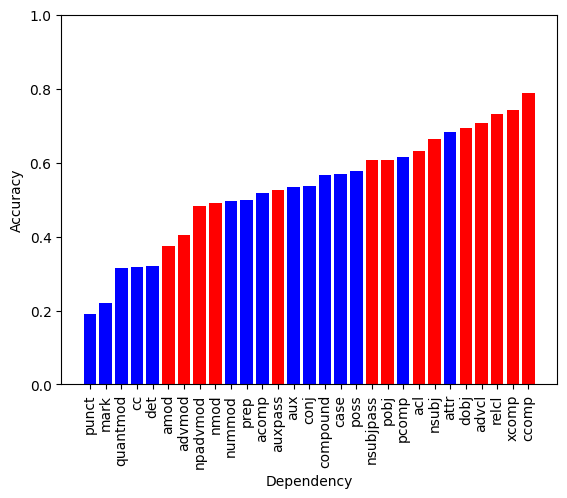

In [148]:
ordered1 = make_graph(f2, f)

100%|████████████████████████████████████████| 500/500 [00:02<00:00, 229.29it/s]


unknown label predet
unknown label preconj
unknown label prt
unknown label intj
unknown label dative
unknown label neg
unknown label agent
unknown label appos
unknown label oprd
unknown label ROOT
defaultdict(<function make_graph.<locals>.<lambda> at 0x148965bc0>, {'compound': [878, 1548], 'pobj': [1360, 2238], 'ROOT': [936, 1378], 'prep': [1294, 2592], 'conj': [345, 641], 'neg': [47, 87], 'dobj': [731, 1054], 'nsubj': [1111, 1671], 'advcl': [303, 429], 'aux': [325, 607], 'relcl': [241, 329], 'nummod': [218, 439], 'cc': [123, 388], 'mark': [53, 239], 'punct': [99, 517], 'det': [392, 1228], 'amod': [435, 1165], 'case': [73, 128], 'poss': [201, 348], 'ccomp': [545, 692], 'appos': [182, 284], 'npadvmod': [162, 336], 'advmod': [341, 841], 'acomp': [97, 187], 'acl': [165, 261], 'attr': [129, 189], 'prt': [24, 49], 'pcomp': [67, 109], 'xcomp': [191, 257], 'dep': [10, 26], 'auxpass': [79, 150], 'nsubjpass': [122, 201], 'quantmod': [37, 117], 'nmod': [106, 216], 'predet': [1, 8], 'expl': [8, 1

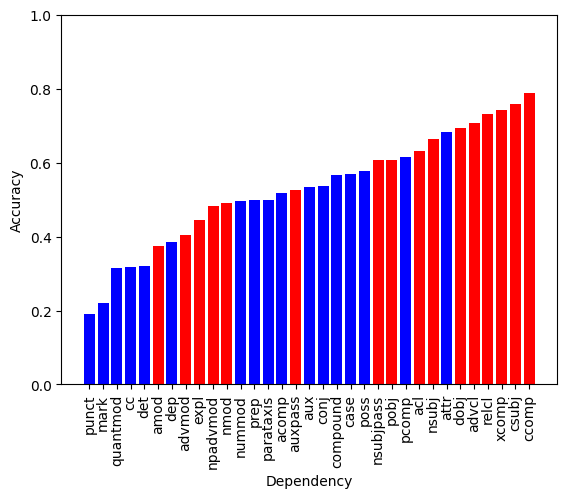

In [144]:
ordered1 = make_graph(f2, f)

100%|████████████████████████████████████████| 500/500 [00:02<00:00, 212.32it/s]


unknown label appos
unknown label ROOT
defaultdict(<function make_graph.<locals>.<lambda> at 0x148918c20>, {'ROOT': [1176, 1469], 'prep': [1677, 2503], 'nsubj': [1340, 1758], 'conj': [419, 659], 'det': [755, 1252], 'pobj': [1886, 2391], 'advcl': [381, 482], 'neg': [47, 73], 'compound': [883, 1370], 'dobj': [946, 1137], 'punct': [97, 564], 'aux': [335, 526], 'relcl': [285, 350], 'nummod': [251, 429], 'mark': [84, 224], 'cc': [168, 379], 'appos': [243, 306], 'ccomp': [702, 806], 'case': [76, 141], 'poss': [257, 342], 'npadvmod': [194, 311], 'amod': [599, 1001], 'advmod': [407, 638], 'acomp': [107, 240], 'attr': [153, 230], 'acl': [197, 231], 'prt': [28, 48], 'xcomp': [228, 281], 'pcomp': [86, 128], 'dep': [14, 25], 'nsubjpass': [160, 199], 'auxpass': [88, 114], 'quantmod': [35, 122], 'nmod': [138, 206], 'predet': [6, 9], 'expl': [8, 13], 'agent': [36, 45], 'oprd': [35, 52], 'csubj': [18, 25], 'parataxis': [15, 31], 'preconj': [3, 7], 'dative': [12, 15], 'intj': [1, 4]})


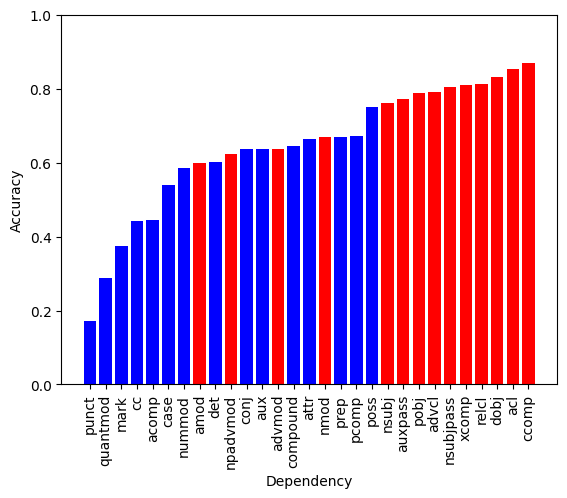

In [149]:
ordered2 = make_graph(f, f)

In [135]:
dep_categories

defaultdict(<function __main__.<lambda>()>,
            {'compound': {'oo': 3435, 'co': 551, 'cc': 284, 'oc': 196},
             'pobj': {'oo': 2796, 'co': 2813, 'cc': 350, 'oc': 908},
             'ROOT': {'oo': 2291, 'co': 910, 'cc': 184, 'oc': 840},
             'prep': {'oo': 59, 'co': 2861, 'cc': 2112, 'oc': 2655},
             'conj': {'oo': 1145, 'co': 379, 'cc': 158, 'oc': 259},
             'neg': {'oo': 14, 'co': 147, 'cc': 49, 'oc': 37},
             'dobj': {'oo': 2037, 'co': 480, 'cc': 72, 'oc': 656},
             'nsubj': {'oo': 2741, 'co': 1248, 'cc': 404, 'oc': 707},
             'advcl': {'oo': 648, 'co': 398, 'cc': 40, 'oc': 254},
             'aux': {'oo': 0, 'co': 1014, 'cc': 477, 'oc': 249},
             'relcl': {'oo': 434, 'co': 355, 'cc': 57, 'oc': 162},
             'nummod': {'oo': 7, 'co': 533, 'cc': 420, 'oc': 347},
             'cc': {'oo': 3, 'co': 290, 'cc': 330, 'oc': 532},
             'mark': {'oo': 11, 'co': 274, 'cc': 246, 'oc': 171},
             'p

In [138]:
dep_types = {}
for k, v in dep_categories.items():
    q = {'oo': v['oo'], 'cc': v['cc'], 'oc': v['co'] + v['oc']}
    dep_types[k] = [i for i in q.keys() if q[i] == max(q.values())][0]
dep_types

{'compound': 'oo',
 'pobj': 'oc',
 'ROOT': 'oo',
 'prep': 'oc',
 'conj': 'oo',
 'neg': 'oc',
 'dobj': 'oo',
 'nsubj': 'oo',
 'advcl': 'oc',
 'aux': 'oc',
 'relcl': 'oc',
 'nummod': 'oc',
 'cc': 'oc',
 'mark': 'oc',
 'punct': 'oc',
 'det': 'oc',
 'amod': 'oo',
 'case': 'oc',
 'poss': 'oc',
 'ccomp': 'oc',
 'appos': 'oo',
 'npadvmod': 'oo',
 'advmod': 'oo',
 'acomp': 'oc',
 'acl': 'oo',
 'attr': 'oc',
 'prt': 'oc',
 'pcomp': 'oc',
 'xcomp': 'oo',
 'dep': 'oc',
 'auxpass': 'oc',
 'nsubjpass': 'oo',
 'quantmod': 'oc',
 'nmod': 'oo',
 'predet': 'cc',
 'expl': 'oc',
 'agent': 'oc',
 'oprd': 'oo',
 'csubj': 'oc',
 'parataxis': 'oo',
 'preconj': 'cc',
 'dative': 'oc',
 'intj': 'cc'}

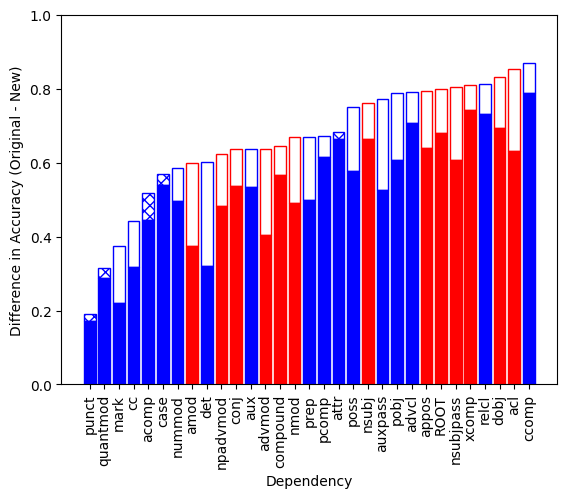

In [152]:
def make_delta_graph(o1, o2):
    base = {}
    up = {}
    # deltas = {}
    for k, v in o1.items():
        base[k] = o1[k][0] / o1[k][1]
        up[k] = o2[k][0] / o2[k][1] - o1[k][0] / o1[k][1]
    ordered = sorted(list(o1.keys()), key=lambda i: max(o1[i][0] / o1[i][1], o2[i][0] / o2[i][1]))

    heights = []
    labels = []
    colors = []
    unknown = []
    bottom = []
    delta = []
    newbary = []
    newbarb = []
    for k in ordered:
        if k not in dep_types:
            continue
        color = {'oo': 'red', 'oc': 'blue', 'cc': 'green'}[dep_types[k]]
        if up[k] > 0:
            heights.append(base[k])
            labels.append(k)
            bottom.append(base[k])
            colors.append(color)
            delta.append(up[k])
            newbary.append(0)
            newbarb.append(0)
        else:
            heights.append(o2[k][0] / o2[k][1])
            labels.append(k)
            bottom.append(0)
            colors.append(color)
            delta.append(0)
            newbary.append(-up[k])
            newbarb.append(o2[k][0] / o2[k][1])
    plt.bar(labels, heights, color=colors, edgecolor=colors)
    plt.bar(labels, delta, bottom=bottom, color='none', edgecolor=colors)
    plt.bar(labels, newbary, bottom=newbarb, edgecolor=colors, color='none', hatch='XXX')
    plt.xticks(rotation=90)
    plt.xlabel('Dependency')
    plt.ylabel('Difference in Accuracy (Original - New)')
    plt.ylim((0, 1))
    return up
up = make_delta_graph(ordered1, ordered2)

{'whiskers': [<matplotlib.lines.Line2D at 0x37efcd700>,
 'caps': [<matplotlib.lines.Line2D at 0x149028f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x148aad100>,
 'medians': [<matplotlib.lines.Line2D at 0x148aad250>,
 'fliers': [<matplotlib.lines.Line2D at 0x148aaff50>,
 'means': []}

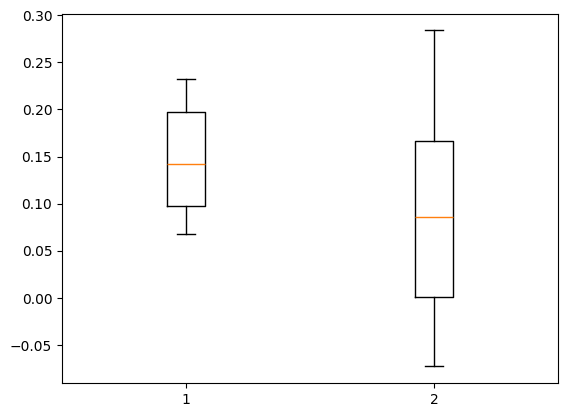

In [157]:
d = collections.defaultdict(list)
for k, v in up.items():
    d[dep_types[k]].append(v)
    # d[dep_types[k]][1] += 1
d['oo'][0] / d['oo'][1], d['oc'][0] / d['oc'][1]
plt.boxplot([d['oo'], d['oc']])

In [ ]:
import numpy as np
from scipy.stats import spearmanr

def calculate_spearmanr(parse, spacy_edges):
    return spearmanr(cd(parse), cd(spacy_edges))

def calculate_spacy_dspr(file, original_file):
    total_dspr = 0
    count = 0
    for (sent, parse), (real_sent, parse2) in tqdm.tqdm(list(zip(parse_full_tikz(file), parse_full_tikz(original_file)))):
        if sent and parse and real_sent and parse2:
            count += 1
            s = ' '.join(real_sent.split())
            doc = nlp(s)
            spacy_edges = get_spacy_edges(s)
            total_dspr += calculate_spearmanr(parse, spacy_edges)
            # print(parse, spacy_edges, calculate_dspr(parse, spacy_edges))
    return total_dspr / count

In [ ]:
calculate_spacy_dspr(f, f)

In [ ]:
calculate_spacy_dspr(f2, f)

In [ ]:
plt.bar(['Original', 'Substituted'], [0.768, 0.561], color=['green', 'orange'])
plt.ylim((0, 1))
plt.ylabel('Accuracy')

In [ ]:
a = get_spacy_edges(s3)
m = max(map(max, a))
o = [0 for _ in range(m)]
for i in range(m):
    if 

100%|████████████████████████████████████████| 500/500 [00:02<00:00, 209.63it/s]


unknown label ROOT
unknown label oprd
unknown label appos
unknown label preconj
unknown label dative
unknown label agent
unknown label predet
unknown label prt
unknown label neg
unknown label intj
defaultdict(<function make_graph.<locals>.<lambda> at 0x148b47d80>, {'nsubj': [273, 894], 'ROOT': [0, 513], 'prep': [311, 1198], 'det': [247, 1048], 'compound': [364, 1078], 'pobj': [174, 1164], 'mark': [9, 151], 'advcl': [4, 157], 'nummod': [65, 324], 'punct': [217, 1374], 'aux': [150, 410], 'dobj': [76, 483], 'conj': [13, 315], 'neg': [22, 58], 'cc': [63, 307], 'relcl': [7, 116], 'appos': [13, 131], 'npadvmod': [31, 184], 'amod': [213, 759], 'poss': [32, 195], 'case': [42, 115], 'ccomp': [14, 233], 'acomp': [40, 82], 'advmod': [137, 470], 'acl': [25, 93], 'attr': [9, 73], 'prt': [13, 35], 'pcomp': [12, 51], 'xcomp': [10, 93], 'dep': [0, 12], 'nsubjpass': [3, 89], 'auxpass': [42, 93], 'quantmod': [9, 57], 'nmod': [7, 98], 'predet': [2, 6], 'expl': [5, 13], 'agent': [7, 22], 'oprd': [1, 18], 

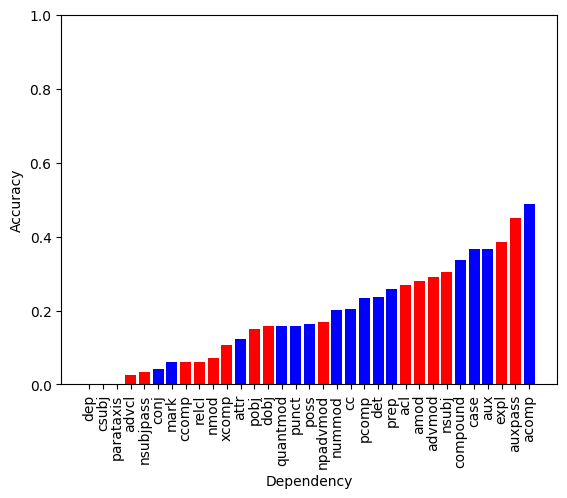

In [166]:
f4 = "/Users/simonchervenak/Documents/GitHub/structural-probes/testing/structural-probes/example/results/tdev3r/demo.tikz"
ordered4 = make_graph(f4, f)

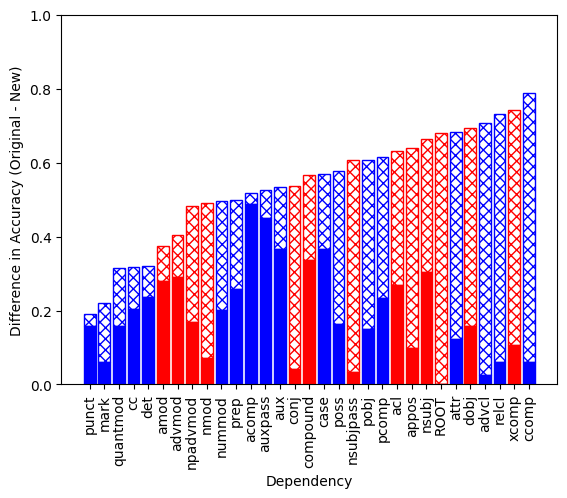

In [167]:
up = make_delta_graph(ordered1, ordered4)